In [6]:
# !pip install numpy
# !pip install cplex
# !pip install qiskit-optimization

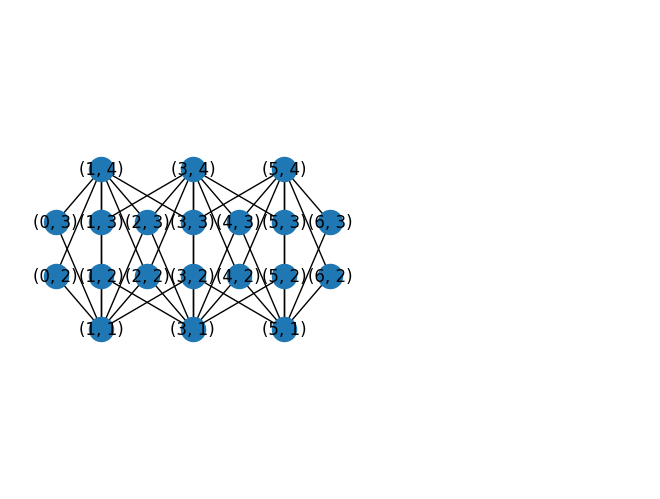

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    

#Draw the graph

pos = {node: node for node in G.nodes()} 
nx.draw(G, pos,with_labels=True)

plt.xlim(-1, 13)
plt.ylim(-2, 7)

plt.xticks(range(0, 13))
plt.yticks(range(1, 7))

plt.show()

def showGraph(S):

    G = nx.Graph()


#     points1 = [] #placement of lidars for one side
#     points2 = [] #placement of lidars for other side
#     points3 = [] #vertices to cover


    for i in range(1, 6, 2):
        point = (i, 1)
        points1.append(point)

    for i in range(1, 6, 2):
        point = (i, 4)
        points2.append(point)

    for i in range(0, 7):
        for j in range(2, 4):
            point = (i, j)
            points3.append(point)

    G.add_nodes_from(points1 + points2 + points3)


    #edge that represents scope between lidar placement and vertices to cover
    for node1 in points1:
      for j in range (node1[1]+1, node1[1]+3):
        if(j==node1[1]+1):
          for i in range(node1[0]-2, node1[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
        if(j== node1[1]+2):
          for i in range(node1[0]-1, node1[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node1), (i,j))
    for node2 in points2:
      for j in range (node2[1]-2,node2[1]):
        if(j== node2[1]-2):
          for i in range(node2[0]-1, node2[0]+2):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))
        if(j==node2[1]-1):
          for i in range(node2[0]-2, node2[0]+3):
            if (i,j) in points3:
              G.add_edge(tuple(node2), (i,j))


    #Draw the graph

    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=True)
    actE =[]
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True)

    #plt.xlim(-2, 13)
    #plt.ylim(-2, 7)

    #plt.xticks(range(1, 13))
    #plt.yticks(range(1, 7))
    nx.draw_networkx_nodes(G, pos, S, node_color='red')
    nx.draw_networkx_edges(G, pos, actE, edge_color='red')
    plt.show()
#showGraph(S)

In [8]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx
import re

m = Model(name='BMW') #compare result log complexity graph generator function that compare quality of the result evaluating resumt (numbre of nodes & number of qubit)
#ten node how to compare how many qubit needs for alll approach and bard thing??? 3 items and x number qubit need quality of nulmber of acticvate node 
#do the pubo on simulating annnealing threatten sa function can be re-use 
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x') #integer dictionary ??? 
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

#max_deg = max(G.degree(v) for v in G.nodes())
#y = m.integer_var_dict(points3, lb=0, ub=max_deg, name='y') 
y = [m.binary_var_dict(G.degree(node), name='z_'+str(node)) for node in points3]

#constraint on number of activate edge
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) >= 1)
    m.add_constraint(sum(y[G.degree(node)].values()) <= G.degree(node))
    print("y[G.degree(node).value]  ==  ",y[G.degree(node)].values())

#constraint link active edge and node 
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))

y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 2)_0'), docplex.mp.Var(type=B,name='z_(1, 2)_1'), docplex.mp.Var(type=B,name='z_(1, 2)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 2)_0'), docplex.mp.Var(type=B,name='z_(1, 2)_1'), docplex.mp.Var(type=B,name='z_(1, 2)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 3)_0'), docplex.mp.Var(type=B,name='z_(1, 3)_1'), docplex.mp.Var(type=B,name='z_(1, 3)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(1, 3)_0'), docplex.mp.Var(type=B,name='z_(1, 3)_1'), docplex.mp.Var(type=B,name='z_(1, 3)_2')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(2, 2)_0'), docplex.mp.Var(type=B,name='z_(2, 2)_1'), docplex.mp.Var(type=B,name='z_(2, 2)_2'), docplex.mp.Var(type=B,name='z_(2, 2)_3')])
y[G.degree(node).value]  ==   dict_values([docplex.mp.Var(type=B,name='z_(2, 2)_0'), docplex.mp.Var(type=B,n

'c:\\Users\\CYTech Student\\workspace\\BMW.lp'

In [9]:
sol_model = m.solve()
#m.print_solution()                                                                                                                                                                                                                          ()
S = []
for (x, y) in sol_model.iter_var_values():
    sx = str(x)
    if sx[0] == 'x':
        S.append((int(sx[2]), int(sx[4])))


In [10]:
quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())

Problem name: BMW

Minimize
  x_1_1 + x_1_4 + x_3_1 + x_3_4 + x_5_1 + x_5_4

Subject to
  Linear constraints (42)
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c1'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c2'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c3'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c4'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c5'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c6'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c7'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c8'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c9'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c10'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c11'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c12'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c13'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c14'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c15'
    z_(2,

In [11]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
# le qubo
conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)
#print(qp.objective.linear.to_array())
#print(qp.objective.linear.coefficients)
#print(qp.objective.quadratic.to_array())
matrice = qp.objective.quadratic.coefficients.asformat("array")
diagonal = qp.objective.linear.coefficients.asformat("array")
num = 0
num1 = 0
for i in range (len(matrice)):
    num1 = 0
    for j in range(len(matrice[i])):
        num1 += 1
        if j == i:
            matrice[i][j] += diagonal[0][j]
    num += 1
matrice2 = np.zeros((81,81))
matrice2[:78,:78] = matrice


print(num, num1)
    # print("diagonal = ",diagonal[0][i])
print(type(matrice))
np.save("matrice_QUBO_JR.npy",matrice2)
# print(qp.objective.constant)
# print(qp.objective.quadratic)
# print(qp.binary_var_list(78)[0].as_tuple())
# for n in qp.integer_var_dict(60).items():
#     print(n[1].name)
# print(qp.integer_var_dict)
#print(qp.prettyprint())

# def extract_qubo_coefficients(qp: QuadraticProgram) -> np.ndarray:
#     num_variables = qp.get_num_vars()
#     qubo_matrix = np.zeros((num_variables, num_variables))

#     for i in range(num_variables):
#         # Coefficient of linear term
#         # qubo_matrix[i, i] = 
#         print("qp.get_variable(",i,")",qp.get_variable(i))
#         print("qp.get_variable(",i,")",qp.objective.linear)
#         # qp.get_linear_coefficient
#         # (qp.get_variable(i))

#         # Coefficients of quadratic terms
#         for j in range(i + 1, num_variables):
#             print("qp.get_variable(",i,")",qp.get_variable(i), "qp.get_variable(",j,")",qp.get_variable(j))
#             # qubo_matrix[i, j] = qp.objective.linear.coefficients(qp.get_variable(i), qp.get_variable(j))
#             # qubo_matrix[j, i] = qubo_matrix[i, j]  # QUBO matrix is symmetric
#     return qubo_matrix

# # Assuming you have a QuadraticProgram named 'quadratic_program'
# qubo_matrix = extract_qubo_coefficients(quadratic_program)
# print(qubo_matrix)
# print(qp.prettyprint())
# #Binary variables = 78

78 78
<class 'numpy.ndarray'>


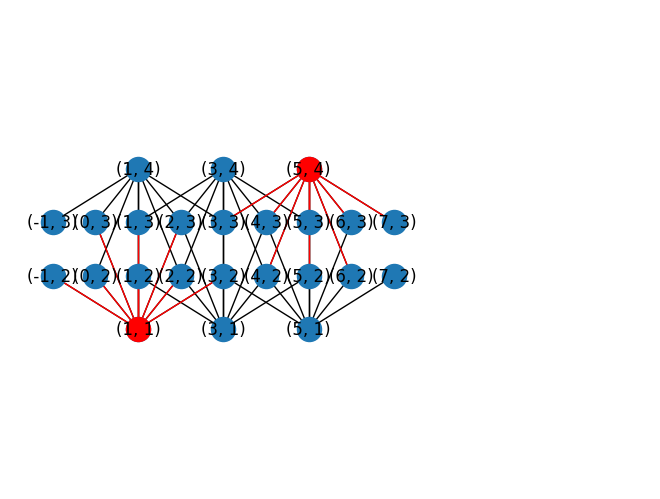

In [12]:

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        G.add_edge(tuple(node2), (i,j))
actE =[]
for node in S:
  for edge in G.edges(node):
    actE.append(edge)
# Draw the graph
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)

plt.xlim(-2, 13)
plt.ylim(-2, 7)

plt.xticks(range(1, 13))
plt.yticks(range(1, 7))
nx.draw_networkx_nodes(G, pos, S, node_color='red')
nx.draw_networkx_edges(G, pos, actE, edge_color='red')
plt.show()